# 회귀 모델 추가 코딩
<ul>
* 1 ~ 100까지 데이터를 잘라서 사용하기
</ul>
<ol>
1. 데이터 분리<br> 
2. Validation 추가<br> 
3. train_test_split<br>
</ol>

## 0 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

from sklearn.model_selection import train_test_split  # 데이터 분리를 위해 사용 

## 1. 데이터셋 생성하기
* 학습 데이터 
* __검증 데이터__
* 테스트 데이터
* 사이킷 런에 잘 구현된 __train_test_split 함수__ 를 이용해서 데이터를 효율적으로 잘라냄 
    - test_size=0.4 : 테스트 사이즈가 40%라는 의미 (train : 60%, test : 40%)
    - suffle : 데이터를 섞을 것인지 선택 - 일반적으로 shuffule을 사용하면 결과가 더 좋음 
* train : val : test - 6:2:2 로 설정  

In [2]:
x = np.array(range(1, 101))
y = np.array(range(1, 101))

# 학습 데이터와 테스트 데이터 분리하기 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.4, shuffle=False)

# 검증 데이터와 테스트 데이터 분리하기 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=66, test_size=0.5)

## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [3]:
model = Sequential()
model.add(Dense(5, input_shape = (1, ), activation ='relu'))
model.add(Dense(3))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [4]:
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [5]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=1,validation_data = (x_val, y_val))

Train on 60 samples, validate on 20 samples
Epoch 1/1000
60/60 [==============================] - 1s 10ms/sample - loss: 614.3070 - mse: 614.3071 - val_loss: 2238.0100 - val_mse: 2238.0100
Epoch 2/1000
60/60 [==============================] - 0s 2ms/sample - loss: 268.8606 - mse: 268.8605 - val_loss: 705.9375 - val_mse: 705.9374
Epoch 3/1000
60/60 [==============================] - 0s 2ms/sample - loss: 62.9484 - mse: 62.9484 - val_loss: 95.5090 - val_mse: 95.5090
Epoch 4/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.5763 - mse: 5.5763 - val_loss: 6.2753 - val_mse: 6.2753
Epoch 5/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.2959 - mse: 0.2959 - val_loss: 0.9454 - val_mse: 0.9454
Epoch 6/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.1452 - mse: 0.1452 - val_loss: 0.6057 - val_mse: 0.6057
Epoch 7/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.1409 - mse: 0.1409 - val_loss: 0.6503 - val_mse: 0.

60/60 [==============================] - 0s 2ms/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 62/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 63/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 64/1000
60/60 [==============================] - 0s 2ms/sample - loss: 8.9149e-04 - mse: 8.9149e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 65/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.1658e-04 - mse: 7.1658e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 66/1000
60/60 [==============================] - 0s 2ms/sample - loss: 6.0302e-04 - mse: 6.0302e-04 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 67/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.7257e-04 - mse: 4.7257e-04 - val_loss: 2.8316e-04 - val_mse: 2.8316e-04
Epoch 68/1000
60/60 [========

Epoch 116/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.0504e-12 - mse: 2.0504e-12 - val_loss: 6.5484e-12 - val_mse: 6.5484e-12
Epoch 117/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.9049e-12 - mse: 2.9049e-12 - val_loss: 6.5484e-12 - val_mse: 6.5484e-12
Epoch 118/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.8969e-12 - mse: 1.8969e-12 - val_loss: 1.4552e-11 - val_mse: 1.4552e-11
Epoch 119/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.3753e-12 - mse: 2.3753e-12 - val_loss: 1.4552e-11 - val_mse: 1.4552e-11
Epoch 120/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.6659e-12 - mse: 4.6659e-12 - val_loss: 1.4552e-11 - val_mse: 1.4552e-11
Epoch 121/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.0613e-12 - mse: 3.0613e-12 - val_loss: 1.4552e-11 - val_mse: 1.4552e-11
Epoch 122/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.6428e-12

60/60 [==============================] - 0s 2ms/sample - loss: 2.3312e-05 - mse: 2.3312e-05 - val_loss: 9.4295e-06 - val_mse: 9.4295e-06
Epoch 171/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.2591e-05 - mse: 7.2591e-05 - val_loss: 1.0222e-07 - val_mse: 1.0222e-07
Epoch 172/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.3167e-06 - mse: 4.3167e-06 - val_loss: 2.0004e-06 - val_mse: 2.0004e-06
Epoch 173/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.0261e-04 - mse: 3.0261e-04 - val_loss: 3.7072e-04 - val_mse: 3.7072e-04
Epoch 174/1000
60/60 [==============================] - 0s 2ms/sample - loss: 9.7470e-04 - mse: 9.7470e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 175/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.1237 - mse: 0.1237 - val_loss: 0.1169 - val_mse: 0.1169
Epoch 176/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0289 - mse: 0.0289 - val_loss: 0.3094 - val_mse

Epoch 225/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.5047e-09 - mse: 3.5047e-09 - val_loss: 1.6735e-10 - val_mse: 1.6735e-10
Epoch 226/1000
60/60 [==============================] - 0s 2ms/sample - loss: 9.9920e-11 - mse: 9.9920e-11 - val_loss: 3.3542e-10 - val_mse: 3.3542e-10
Epoch 227/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.1523e-11 - mse: 2.1523e-11 - val_loss: 5.6025e-11 - val_mse: 5.6025e-11
Epoch 228/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.2308e-11 - mse: 2.2308e-11 - val_loss: 3.4925e-10 - val_mse: 3.4925e-10
Epoch 229/1000
60/60 [==============================] - 0s 2ms/sample - loss: 6.3762e-12 - mse: 6.3762e-12 - val_loss: 1.1132e-10 - val_mse: 1.1132e-10
Epoch 230/1000
60/60 [==============================] - 0s 2ms/sample - loss: 6.3740e-12 - mse: 6.3740e-12 - val_loss: 6.9849e-11 - val_mse: 6.9849e-11
Epoch 231/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.3909e-12

60/60 [==============================] - 0s 2ms/sample - loss: 9.4640e-12 - mse: 9.4640e-12 - val_loss: 1.0623e-10 - val_mse: 1.0623e-10
Epoch 280/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.5757e-11 - mse: 1.5757e-11 - val_loss: 3.6380e-11 - val_mse: 3.6380e-11
Epoch 281/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.0271e-11 - mse: 1.0271e-11 - val_loss: 1.2078e-10 - val_mse: 1.2078e-10
Epoch 282/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.7724e-12 - mse: 7.7724e-12 - val_loss: 2.0518e-10 - val_mse: 2.0518e-10
Epoch 283/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.1246e-11 - mse: 2.1246e-11 - val_loss: 5.6752e-11 - val_mse: 5.6752e-11
Epoch 284/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.3193e-11 - mse: 1.3193e-11 - val_loss: 1.3752e-10 - val_mse: 1.3752e-10
Epoch 285/1000
60/60 [==============================] - 0s 2ms/sample - loss: 8.9522e-10 - mse: 8.9522e

Epoch 334/1000
60/60 [==============================] - 0s 2ms/sample - loss: 6.7275e-12 - mse: 6.7275e-12 - val_loss: 4.3656e-11 - val_mse: 4.3656e-11
Epoch 335/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.5788e-12 - mse: 2.5788e-12 - val_loss: 1.4843e-10 - val_mse: 1.4843e-10
Epoch 336/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.2324e-12 - mse: 7.2324e-12 - val_loss: 8.2218e-11 - val_mse: 8.2218e-11
Epoch 337/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.2096e-10 - mse: 3.2096e-10 - val_loss: 6.4028e-10 - val_mse: 6.4028e-10
Epoch 338/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.0685e-10 - mse: 3.0685e-10 - val_loss: 1.1234e-09 - val_mse: 1.1234e-09
Epoch 339/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.8878e-11 - mse: 4.8878e-11 - val_loss: 4.6566e-11 - val_mse: 4.6566e-11
Epoch 340/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.2052e-11

Epoch 389/1000
60/60 [==============================] - 0s 2ms/sample - loss: 6.0140e-09 - mse: 6.0140e-09 - val_loss: 5.2678e-09 - val_mse: 5.2678e-09
Epoch 390/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.3385e-10 - mse: 2.3385e-10 - val_loss: 2.6193e-11 - val_mse: 2.6193e-11
Epoch 391/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.0423e-11 - mse: 2.0423e-11 - val_loss: 4.7294e-11 - val_mse: 4.7294e-11
Epoch 392/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.3566e-11 - mse: 1.3566e-11 - val_loss: 1.4843e-10 - val_mse: 1.4843e-10
Epoch 393/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.1164e-11 - mse: 1.1164e-11 - val_loss: 5.8208e-12 - val_mse: 5.8208e-12
Epoch 394/1000
60/60 [==============================] - 0s 2ms/sample - loss: 8.8013e-12 - mse: 8.8013e-12 - val_loss: 5.0204e-11 - val_mse: 5.0204e-11
Epoch 395/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.2648e-11

60/60 [==============================] - 0s 2ms/sample - loss: 2.9440e-04 - mse: 2.9440e-04 - val_loss: 5.2177e-06 - val_mse: 5.2177e-06
Epoch 444/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 445/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 446/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 447/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.7753e-04 - mse: 5.7753e-04 - val_loss: 9.4062e-07 - val_mse: 9.4062e-07
Epoch 448/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 449/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 450/1000
60/60 [=========

60/60 [==============================] - 0s 2ms/sample - loss: 6.8658e-12 - mse: 6.8658e-12 - val_loss: 6.5484e-11 - val_mse: 6.5484e-11
Epoch 499/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.7399e-11 - mse: 4.7399e-11 - val_loss: 4.9331e-10 - val_mse: 4.9331e-10
Epoch 500/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.3803e-08 - mse: 5.3803e-08 - val_loss: 1.3270e-06 - val_mse: 1.3270e-06
Epoch 501/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.3956e-07 - mse: 2.3956e-07 - val_loss: 1.8587e-07 - val_mse: 1.8587e-07
Epoch 502/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.2729e-06 - mse: 5.2729e-06 - val_loss: 3.4921e-04 - val_mse: 3.4921e-04
Epoch 503/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.4174e-05 - mse: 3.4174e-05 - val_loss: 7.6572e-09 - val_mse: 7.6572e-09
Epoch 504/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.7652e-05 - mse: 5.7652e

60/60 [==============================] - 0s 2ms/sample - loss: 5.0928e-09 - mse: 5.0928e-09 - val_loss: 1.0006e-07 - val_mse: 1.0006e-07
Epoch 553/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.2213e-08 - mse: 2.2213e-08 - val_loss: 1.4210e-08 - val_mse: 1.4210e-08
Epoch 554/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.9596e-08 - mse: 7.9596e-08 - val_loss: 2.4095e-07 - val_mse: 2.4095e-07
Epoch 555/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.1351e-08 - mse: 2.1351e-08 - val_loss: 4.1473e-11 - val_mse: 4.1473e-11
Epoch 556/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.9768e-08 - mse: 5.9768e-08 - val_loss: 3.4605e-08 - val_mse: 3.4605e-08
Epoch 557/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.6558e-07 - mse: 1.6558e-07 - val_loss: 9.3869e-06 - val_mse: 9.3869e-06
Epoch 558/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.3144e-05 - mse: 1.3144e

Epoch 607/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.3082e-12 - mse: 7.3082e-12 - val_loss: 3.7835e-11 - val_mse: 3.7835e-11
Epoch 608/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.6582e-10 - mse: 1.6582e-10 - val_loss: 1.2842e-09 - val_mse: 1.2842e-09
Epoch 609/1000
60/60 [==============================] - 0s 2ms/sample - loss: 9.4007e-10 - mse: 9.4007e-10 - val_loss: 3.6933e-09 - val_mse: 3.6933e-09
Epoch 610/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.4171e-07 - mse: 1.4171e-07 - val_loss: 8.8642e-08 - val_mse: 8.8642e-08
Epoch 611/1000
60/60 [==============================] - 0s 2ms/sample - loss: 9.8685e-08 - mse: 9.8685e-08 - val_loss: 8.5647e-08 - val_mse: 8.5647e-08
Epoch 612/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.3904e-07 - mse: 1.3904e-07 - val_loss: 1.9578e-06 - val_mse: 1.9578e-06
Epoch 613/1000
60/60 [==============================] - 0s 2ms/sample - loss: 9.0233e-07

Epoch 663/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 664/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 665/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 666/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0930 - val_mse: 0.0930
Epoch 667/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 668/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0016 - mse: 0.0016 - val_loss: 3.0348e-05 - val_mse: 3.0348e-05
Epoch 669/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.1488e-04 - mse: 7.1488e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 670/1000
60/60 [==========

60/60 [==============================] - 0s 2ms/sample - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0461 - val_mse: 0.0461
Epoch 719/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 720/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0025 - mse: 0.0025 - val_loss: 2.4961e-04 - val_mse: 2.4961e-04
Epoch 721/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.3494e-05 - mse: 1.3494e-05 - val_loss: 1.2212e-04 - val_mse: 1.2212e-04
Epoch 722/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.5849e-06 - mse: 5.5849e-06 - val_loss: 4.6850e-05 - val_mse: 4.6850e-05
Epoch 723/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.7384e-05 - mse: 5.7384e-05 - val_loss: 8.7573e-05 - val_mse: 8.7573e-05
Epoch 724/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.3951e-04 - mse: 1.3951e-04 - val_loss: 6.6996e-04 - val_mse: 6.

Epoch 773/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.0940e-09 - mse: 3.0940e-09 - val_loss: 4.1982e-10 - val_mse: 4.1982e-10
Epoch 774/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.6988e-06 - mse: 1.6988e-06 - val_loss: 3.6621e-05 - val_mse: 3.6621e-05
Epoch 775/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0239 - mse: 0.0239 - val_loss: 0.2309 - val_mse: 0.2309
Epoch 776/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0843 - mse: 0.0843 - val_loss: 0.3443 - val_mse: 0.3443
Epoch 777/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 778/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.0405e-04 - mse: 3.0405e-04 - val_loss: 1.5155e-04 - val_mse: 1.5155e-04
Epoch 779/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.4516e-05 - mse: 1.4516e-05 - val_loss: 2.1964e-04 - val_

Epoch 828/1000
60/60 [==============================] - 0s 2ms/sample - loss: 5.3147e-10 - mse: 5.3147e-10 - val_loss: 2.3356e-10 - val_mse: 2.3356e-10
Epoch 829/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.9394e-10 - mse: 1.9394e-10 - val_loss: 6.9849e-10 - val_mse: 6.9849e-10
Epoch 830/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.9311e-11 - mse: 4.9311e-11 - val_loss: 8.0036e-11 - val_mse: 8.0036e-11
Epoch 831/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.1504e-11 - mse: 2.1504e-11 - val_loss: 3.6380e-11 - val_mse: 3.6380e-11
Epoch 832/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.2098e-11 - mse: 1.2098e-11 - val_loss: 2.4738e-11 - val_mse: 2.4738e-11
Epoch 833/1000
60/60 [==============================] - 0s 2ms/sample - loss: 8.6388e-12 - mse: 8.6388e-12 - val_loss: 1.0186e-11 - val_mse: 1.0186e-11
Epoch 834/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.8230e-11

60/60 [==============================] - 0s 2ms/sample - loss: 2.9684e-07 - mse: 2.9684e-07 - val_loss: 3.6593e-08 - val_mse: 3.6593e-08
Epoch 883/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.0070e-08 - mse: 3.0070e-08 - val_loss: 1.6308e-08 - val_mse: 1.6308e-08
Epoch 884/1000
60/60 [==============================] - 0s 2ms/sample - loss: 8.8484e-09 - mse: 8.8484e-09 - val_loss: 7.2716e-09 - val_mse: 7.2716e-09
Epoch 885/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.6842e-09 - mse: 2.6842e-09 - val_loss: 6.9660e-09 - val_mse: 6.9660e-09
Epoch 886/1000
60/60 [==============================] - 0s 2ms/sample - loss: 8.0371e-11 - mse: 8.0371e-11 - val_loss: 9.6770e-11 - val_mse: 9.6770e-11
Epoch 887/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.0131e-11 - mse: 1.0131e-11 - val_loss: 6.1118e-11 - val_mse: 6.1118e-11
Epoch 888/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.8168e-12 - mse: 4.8168e

60/60 [==============================] - 0s 2ms/sample - loss: 3.3469e-07 - mse: 3.3469e-07 - val_loss: 6.9547e-07 - val_mse: 6.9547e-07
Epoch 937/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.1244e-06 - mse: 2.1244e-06 - val_loss: 7.7514e-05 - val_mse: 7.7514e-05
Epoch 938/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.2905e-04 - mse: 3.2905e-04 - val_loss: 1.4362e-06 - val_mse: 1.4362e-06
Epoch 939/1000
60/60 [==============================] - 0s 2ms/sample - loss: 3.1198e-04 - mse: 3.1198e-04 - val_loss: 1.5737e-04 - val_mse: 1.5737e-04
Epoch 940/1000
60/60 [==============================] - 0s 2ms/sample - loss: 4.7589e-05 - mse: 4.7589e-05 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 941/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 942/1000
60/60 [==============================] - 0s 2ms/sample - loss: 0.0088 - mse: 0.0088 - val_loss: 1.9633e-04 - val

Epoch 992/1000
60/60 [==============================] - 0s 2ms/sample - loss: 7.3534e-10 - mse: 7.3534e-10 - val_loss: 5.8331e-09 - val_mse: 5.8331e-09
Epoch 993/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.0570e-09 - mse: 2.0570e-09 - val_loss: 1.5743e-08 - val_mse: 1.5743e-08
Epoch 994/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.9021e-09 - mse: 2.9021e-09 - val_loss: 5.9612e-09 - val_mse: 5.9612e-09
Epoch 995/1000
60/60 [==============================] - 0s 2ms/sample - loss: 9.9022e-10 - mse: 9.9022e-10 - val_loss: 1.3861e-09 - val_mse: 1.3861e-09
Epoch 996/1000
60/60 [==============================] - 0s 2ms/sample - loss: 2.0622e-10 - mse: 2.0622e-10 - val_loss: 9.3860e-11 - val_mse: 9.3860e-11
Epoch 997/1000
60/60 [==============================] - 0s 2ms/sample - loss: 6.7136e-11 - mse: 6.7136e-11 - val_loss: 1.1642e-09 - val_mse: 1.1642e-09
Epoch 998/1000
60/60 [==============================] - 0s 2ms/sample - loss: 1.6685e-10

## 5. 학습과정 살펴보기

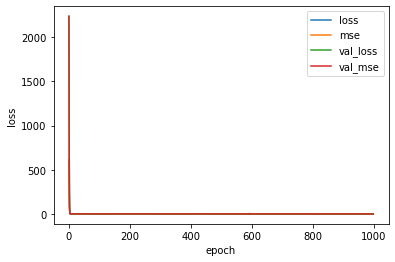

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_mse'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse', 'val_loss', 'val_mse'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [7]:
loss, mse = model.evaluate(x_test, y_test, batch_size =1)
print("loss : ", loss)
print("mse : ", mse )

20/20 [==============================] - 0s 1ms/sample - loss: 5.8208e-12 - mse: 5.8208e-12
loss :  5.820766091346741e-12
mse :  5.820766e-12


## 7. 예측하기 

In [8]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

결과물 : 
 [[ 65.00001]
 [ 80.     ]
 [ 91.     ]
 [ 66.     ]
 [ 62.     ]
 [ 96.     ]
 [ 64.     ]
 [ 89.     ]
 [ 92.     ]
 [100.     ]
 [ 93.     ]
 [ 86.     ]
 [ 84.99999]
 [ 78.     ]
 [ 70.     ]
 [ 75.     ]
 [ 69.     ]
 [ 73.     ]
 [ 84.     ]
 [ 97.     ]]


#### RMSE 구하기
* __평균 제곱근 오차 - RMSE(Root Mean Squared Error)__ 
    - 회귀 분석을 평가할 때 가장 많이 사용하는 지표 중에 하나
    - MSE에 루트를 사용
    - 원래 데이터에서 평균을 뺀 값을 제곱하여 모두 더한 뒤 전체 개수로 나눈 값에 루트를 씌운 것
    - RMSE는 낮을수록 정밀도가 높음

In [9]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE : ", RMSE(y_test, y_predict))

RMSE :  2.412626388678268e-06


#### R2 구하기
* __결정 계수(R2)__
    - 회귀 분석에서 많이 사용하는 지표 중에 하나
    - RMSE와 반대로 높을수록 좋은 지표
    - 0~1사이의 수치 - 0.73 정도의 값이 나오면 73%의 설명력을 가진다고 해석 
    - 사이킷런에서 r2_score 함수로 제공 
    - 만약 R2의 값이 음수가 나오면 학습 시 머신에 뭔가 잘못된 부분이 존재한다는 의미 

In [10]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print("R2 : ", r2_y_predict)

R2 :  0.9999999999999588


#### 새로운 데이터로 예측 수행하기 
* x_predict에 새로운 값을 설정한 후 y_predict 값을 출력한다. 

In [11]:
x_predict = np.array(range(101, 111))
y_predict = model.predict(x_predict)
print(y_predict)

[[101.      ]
 [102.      ]
 [103.      ]
 [103.99999 ]
 [105.      ]
 [105.99999 ]
 [107.      ]
 [108.      ]
 [108.999985]
 [110.      ]]
